# Proyek Akhir Kelompok 2 JST

## Import Libraries

In [1]:
import numpy as np
import pandas as pd
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

## Data Collecting

Import dataset untuk memprediksi terhadap kualitas air menggunakan algoritma Backpropagation

In [2]:
!gdown 1D6ND9-naeS4ADHs_4UamldFAzTRzGf7p

Downloading...
From: https://drive.google.com/uc?id=1D6ND9-naeS4ADHs_4UamldFAzTRzGf7p
To: /content/waterQuality1.csv
100% 841k/841k [00:00<00:00, 83.3MB/s]


Dataset yang sudah di-import akan disimpan ke dalam sebuah variabel 'data'

In [3]:
data = pd.read_csv("waterQuality1.csv")
data.head()

,aluminium,ammonia,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,...,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium,is_safe
0,1.65,9.08,0.04,2.85,0.007,0.35,0.83,0.17,0.05,0.20,...,0.054,16.08,1.13,0.007,37.75,6.78,0.08,0.34,0.02,1
1,2.32,21.16,0.01,3.31,0.002,5.28,0.68,0.66,0.90,0.65,...,0.100,2.01,1.93,0.003,32.26,3.21,0.08,0.27,0.05,1
2,1.01,14.02,0.04,0.58,0.008,4.24,0.53,0.02,0.99,0.05,...,0.078,14.16,1.11,0.006,50.28,7.07,0.07,0.44,0.01,0
3,1.36,11.33,0.04,2.96,0.001,7.23,0.03,1.66,1.08,0.71,...,0.016,1.41,1.29,0.004,9.12,1.72,0.02,0.45,0.05,1
4,0.92,24.33,0.03,0.20,0.006,2.67,0.69,0.57,0.61,0.13,...,0.117,6.74,1.11,0.003,16.90,2.41,0.02,0.06,0.02,1


Keterangan fitur:

* aluminium - Aluminium, berbahaya jika lebih besar dari 2,8
* ammonia - Amonia, berbahaya jika lebih besar dari 32,5
* arsenic - Arsenik, berbahaya jika lebih besar dari 0,01
* barium - Barium, berbahaya jika lebih besar dari 2
* cadmium - Kadmium, berbahaya jika lebih besar dari 0,005
* chloramine - Kloramin, berbahaya jika lebih besar dari 4
* chromium - Kromium, berbahaya jika lebih besar dari 0,1
* copper - Tembaga, berbahaya jika lebih besar dari 1,3
* flouride - Flourida, berbahaya jika lebih besar dari 1,5
* bacteria - Bakteri, berbahaya jika lebih besar dari 0
* viruses - Virus, berbahaya jika lebih besar dari 0
* lead - Timbal, berbahaya jika lebih besar dari 0,015
* nitrates - Nitrat, berbahaya jika lebih besar dari 10
* nitrites - Nitrit, berbahaya jika lebih besar dari 1
* mercury - Merkuri, berbahaya jika lebih besar dari 0,002
* perchlorate - Perklorat, berbahaya jika lebih besar dari 56
* radium - Radium, berbahaya jika lebih besar dari 5
* selenium - Selenium, berbahaya jika lebih besar dari 0,5
* silver - Perak, berbahaya jika lebih besar dari 0,1
* uranium - Uranium, berbahaya jika lebih besar dari 0,3

Keterangan label:

* is_safe - atribut kelas {0 - tidak aman, 1 - aman}

## Explorary Data Analysis (EDA) dan Preprocessing

### Melihat informasi dataset

Memeriksa informasi tentang dataset termasuk indeks dtype dan kolom, nilai non-null dan penggunaan memori

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7999 entries, 0 to 7998
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   aluminium    7999 non-null   float64
 1   ammonia      7999 non-null   object 
 2   arsenic      7999 non-null   float64
 3   barium       7999 non-null   float64
 4   cadmium      7999 non-null   float64
 5   chloramine   7999 non-null   float64
 6   chromium     7999 non-null   float64
 7   copper       7999 non-null   float64
 8   flouride     7999 non-null   float64
 9   bacteria     7999 non-null   float64
 10  viruses      7999 non-null   float64
 11  lead         7999 non-null   float64
 12  nitrates     7999 non-null   float64
 13  nitrites     7999 non-null   float64
 14  mercury      7999 non-null   float64
 15  perchlorate  7999 non-null   float64
 16  radium       7999 non-null   float64
 17  selenium     7999 non-null   float64
 18  silver       7999 non-null   float64
 19  uraniu

Keterangan:

* Terdapat 7999 nilai non-null di setiap atribut
* Terdapat tiga macam tipe data yaitu berupa 'float64' dan 'object'

Melihat kolom pada dataset

In [5]:
data.columns

Index(['aluminium', 'ammonia', 'arsenic', 'barium', 'cadmium', 'chloramine',
       'chromium', 'copper', 'flouride', 'bacteria', 'viruses', 'lead',
       'nitrates', 'nitrites', 'mercury', 'perchlorate', 'radium', 'selenium',
       'silver', 'uranium', 'is_safe'],
      dtype='object')

### Mendeteksi missing value

Melakukan pemeriksaan terhadap missing value atau null

In [6]:
data.isnull().sum()

aluminium      0
ammonia        0
arsenic        0
barium         0
cadmium        0
chloramine     0
chromium       0
copper         0
flouride       0
bacteria       0
viruses        0
lead           0
nitrates       0
nitrites       0
mercury        0
perchlorate    0
radium         0
selenium       0
silver         0
uranium        0
is_safe        0
dtype: int64

Keterangan: Tidak ditemukan missing value atau null value pada dataset

### Mendeteksi duplikasi data

Melakukan pemeriksaan terhadap data yang duplikat

In [7]:
duplicate_rows = data[data.duplicated()]
print(duplicate_rows)

Empty DataFrame
Columns: [aluminium, ammonia, arsenic, barium, cadmium, chloramine, chromium, copper, flouride, bacteria, viruses, lead, nitrates, nitrites, mercury, perchlorate, radium, selenium, silver, uranium, is_safe]
Index: []

[0 rows x 21 columns]


Keterangan: Tidak ditemukan data yang duplikat pada dataset

### Menyesuaikan value pada label

Melakukan pemeriksaan terhadap value pada label

In [8]:
data['is_safe'].value_counts()

0        7084
1         912
#NUM!       3
Name: is_safe, dtype: int64

Keterangan: Setelah dilakukan pengecekan value dari label, terdapat value yang bermasalah yang ditandai dengan "#NUM!"

Menggunakan dataset hanya dengan label yang memiliki value 0 dan 1 saja

In [9]:
data = data[data['is_safe'].isin(['0', '1'])]

### Memperbaiki tipe data

Mengubah tipe data kolom 'ammonia' dan 'is_safe' dari yang semula object menjadi float64 dan int64

In [10]:
data['ammonia'] = data['ammonia'].astype('float64')
data['is_safe'] = data['is_safe'].astype('int64')

<ipython-input-10-4ff8c3972e51>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['ammonia'] = data['ammonia'].astype('float64')
<ipython-input-10-4ff8c3972e51>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['is_safe'] = data['is_safe'].astype('int64')


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7996 entries, 0 to 7998
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   aluminium    7996 non-null   float64
 1   ammonia      7996 non-null   float64
 2   arsenic      7996 non-null   float64
 3   barium       7996 non-null   float64
 4   cadmium      7996 non-null   float64
 5   chloramine   7996 non-null   float64
 6   chromium     7996 non-null   float64
 7   copper       7996 non-null   float64
 8   flouride     7996 non-null   float64
 9   bacteria     7996 non-null   float64
 10  viruses      7996 non-null   float64
 11  lead         7996 non-null   float64
 12  nitrates     7996 non-null   float64
 13  nitrites     7996 non-null   float64
 14  mercury      7996 non-null   float64
 15  perchlorate  7996 non-null   float64
 16  radium       7996 non-null   float64
 17  selenium     7996 non-null   float64
 18  silver       7996 non-null   float64
 19  uraniu

### Menganalisa penyebaran data

Melakukan Analisis Univariat untuk deskripsi statistik setiap kolom

In [12]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
aluminium,7996.0,0.666396,1.265323,0.00,0.0400,0.070,0.2800,5.05
ammonia,7996.0,14.278212,8.878930,-0.08,6.5775,14.130,22.1325,29.84
arsenic,7996.0,0.161477,0.252632,0.00,0.0300,0.050,0.1000,1.05
barium,7996.0,1.567928,1.216227,0.00,0.5600,1.190,2.4825,4.94
cadmium,7996.0,0.042803,0.036049,0.00,0.0080,0.040,0.0700,0.13
chloramine,7996.0,2.177589,2.567210,0.00,0.1000,0.530,4.2400,8.68
chromium,7996.0,0.247300,0.270663,0.00,0.0500,0.090,0.4400,0.90
copper,7996.0,0.805940,0.653595,0.00,0.0900,0.750,1.3900,2.00
flouride,7996.0,0.771646,0.435423,0.00,0.4075,0.770,1.1600,1.50
bacteria,7996.0,0.319714,0.329497,0.00,0.0000,0.220,0.6100,1.00


Melakukan Analisis Bivariat dengan matriks korelasi untuk menguji hubungan antar kolom menggunakan Heatmap

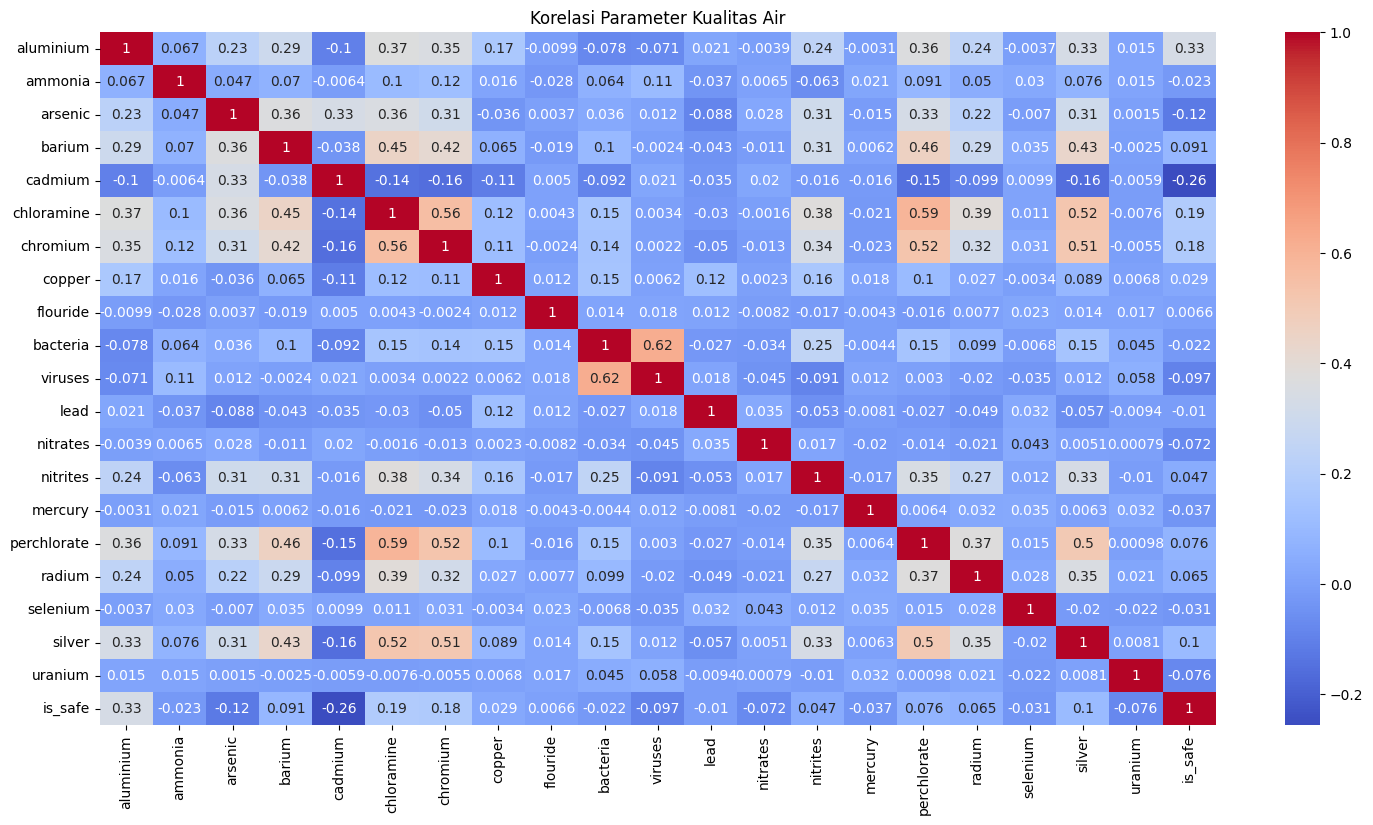

In [13]:
correlation_matrix = data.corr()

# Membuat Heatmap
plt.figure(figsize = (18, 9))
sns.heatmap(correlation_matrix, annot = True, cmap = 'coolwarm')

# Menambahkan judul
plt.title("Korelasi Parameter Kualitas Air")
plt.show()

In [14]:
data.corr()[abs(data.corr()['is_safe']) > 0.1]['is_safe']

aluminium     0.333974
arsenic      -0.123362
cadmium      -0.256034
chloramine    0.186704
chromium      0.182306
silver        0.102813
is_safe       1.000000
Name: is_safe, dtype: float64

Keterangan: Terlihat bahwa terdapat korelasi yang cukup besar antara fitur 'aluminium', 'arsenic', 'cadmium', 'chloramine', 'chromium', dan 'silver' terhadap label

### Menangani outlier

Melakukan pemeriksaan terhadap potensi outliner yang ada pada setiap fitur terhadap label

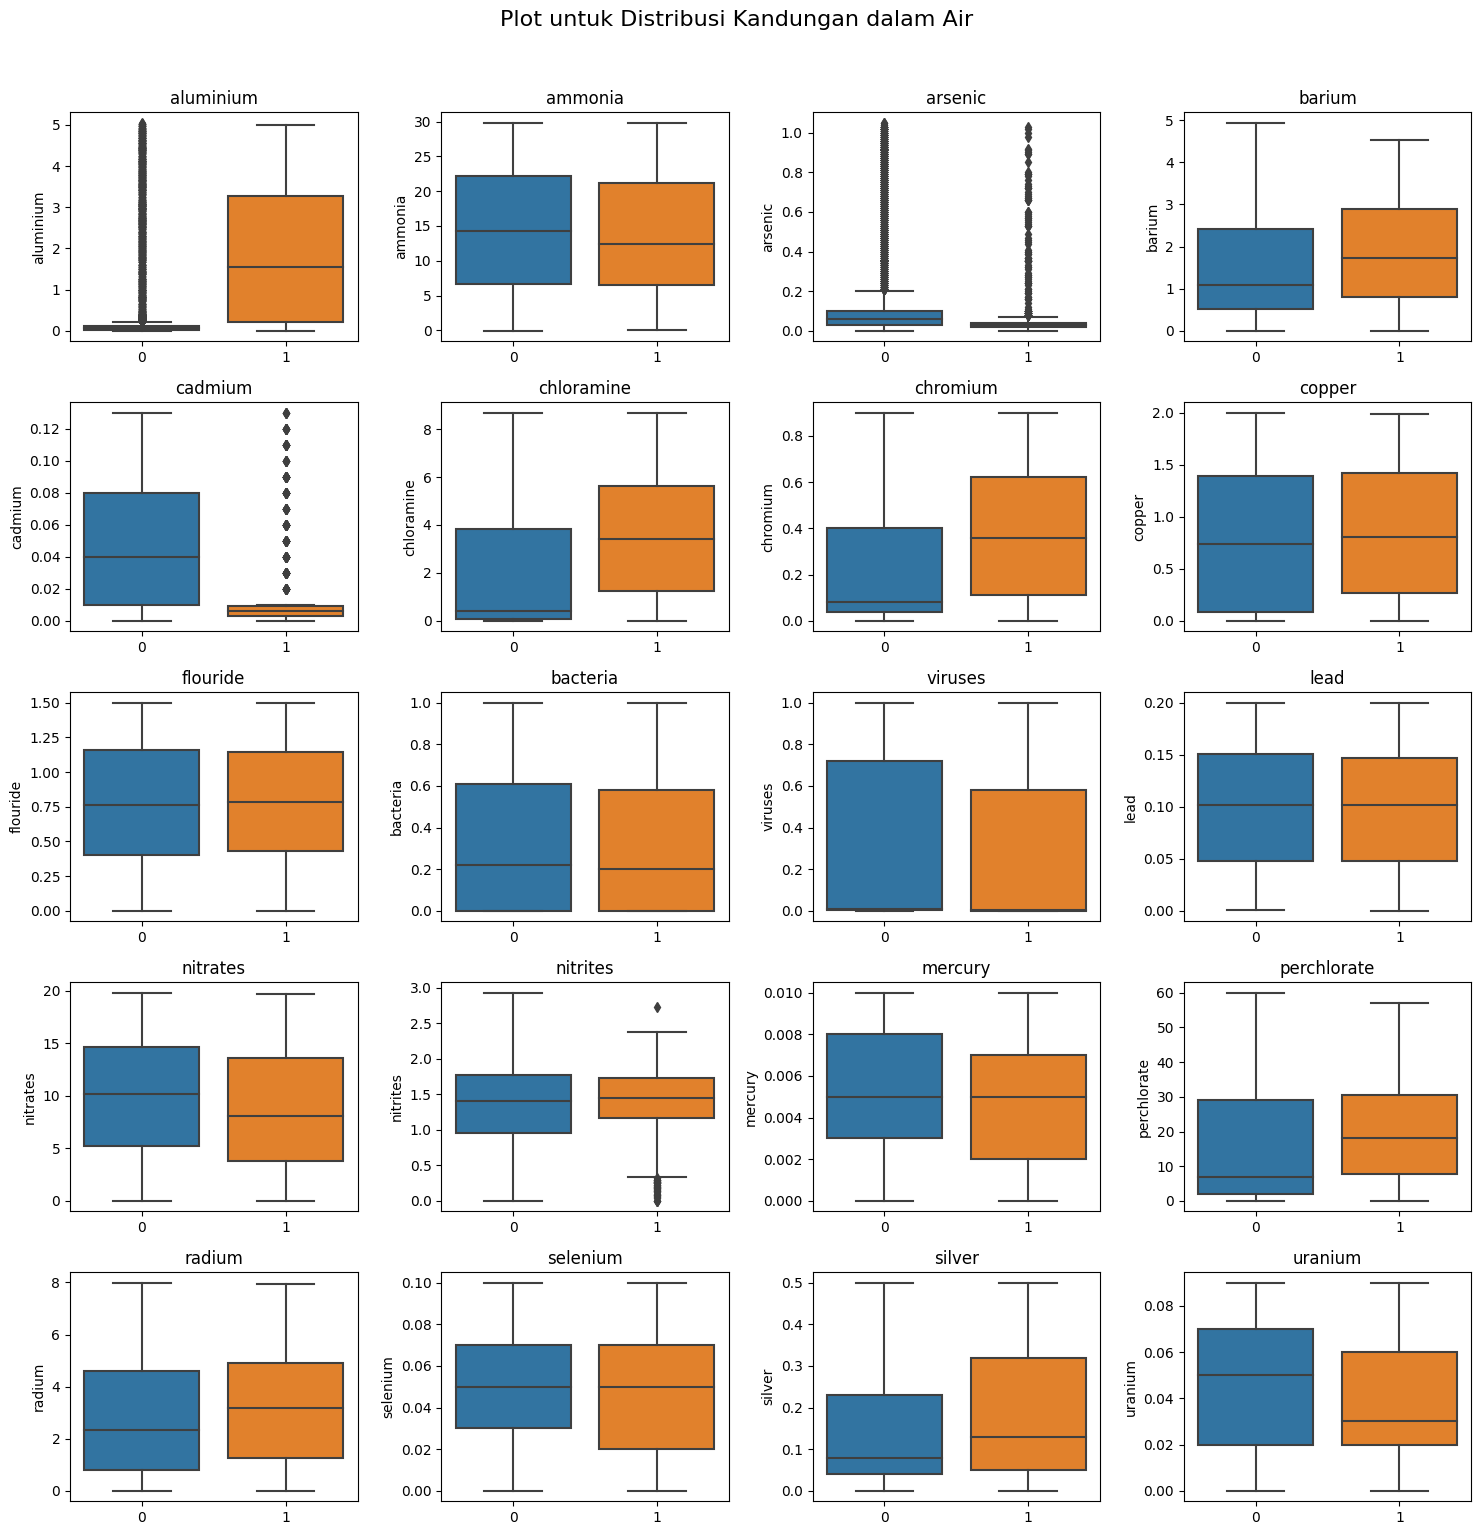

In [15]:
columns_to_plot = data.columns.tolist()
columns_to_plot.remove('is_safe')

num_rows = 5
num_cols = 4

fig, axes = plt.subplots(nrows = num_rows, ncols = num_cols, figsize = (15, 15))

for i, col in enumerate(columns_to_plot):
    row_index = i // num_cols
    col_index = i % num_cols
    sns.boxplot(data = data, x = 'is_safe', y = col, ax = axes[row_index, col_index])
    axes[row_index, col_index].set_title(col)
    axes[row_index, col_index].set_xlabel('')

plt.suptitle("Plot untuk Distribusi Kandungan dalam Air", y = 1.02, fontsize = 16)

plt.tight_layout()
plt.show()

Keterangan: Terlihat bahwa terdapat outlier yang cukup banyak pada 'aluminium', 'arsenic', 'cadmium', dan 'nitrites'

### Mendeteksi kemiringan data

Mencari tahu potensi kemiringan dalam data

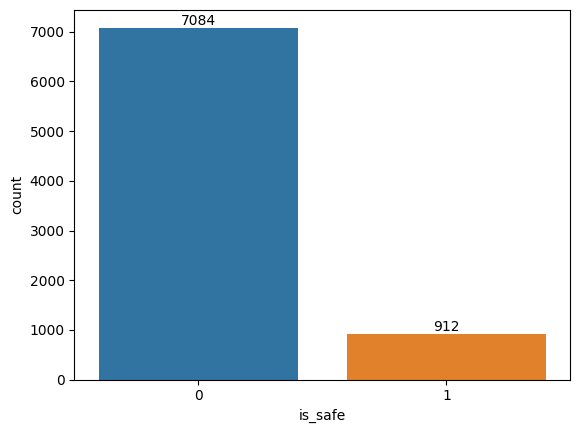

In [16]:
ax = sns.countplot(data = data, x = 'is_safe')
abs_values = data['is_safe'].value_counts(ascending=False).values
ax.bar_label(container = ax.containers[0], labels = abs_values)

plt.show()

Keterangan: Terlihat bahwa terdapat imbalanced data yang ditunjukkan dengan jarak perbandingan yang besar pada label yaitu 7084 berbanding 912. Akan dilakukan metode oversampling

### Memisahkan dan membagi data pelatihan dan data pengujian

In [29]:
X = data.drop('is_safe', axis=1)
y = data['is_safe']

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Memisahkan fitur dan label

### Menyeimbangkan data

Melakukan penyeimbangan data pelatihan dengan metode SMOTE untuk oversampling

In [31]:
print("Distribusi label sebelum SMOTE:")
print(y_train.value_counts())

Distribusi label sebelum SMOTE:
0    4993
1     604
Name: is_safe, dtype: int64


In [32]:
oversampler = SMOTE(sampling_strategy='auto', random_state=42)
X_train, y_train = oversampler.fit_resample(X_train, y_train)

Memeriksa distribusi label

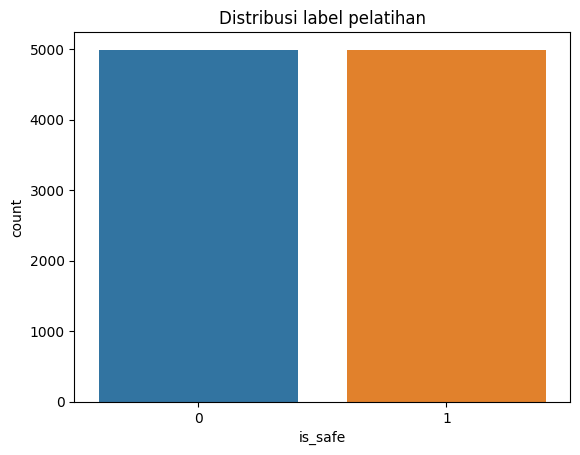

In [33]:
sns.countplot(x = y_train)
plt.title("Distribusi label pelatihan")
plt.xlabel("is_safe")
plt.show()

Melakukan penyeimbangan data pengujian dengan metode RandomUndersampler untuk undersampling

In [34]:
print("Distribusi label sebelum RandomUndersampler:")
print(y_test.value_counts())

Distribusi label sebelum RandomUndersampler:
0    2091
1     308
Name: is_safe, dtype: int64


In [35]:
class_counts = pd.Series(y_test).value_counts()
majority_class = class_counts.idxmax()
minority_class_count = class_counts.min()
sampling_strategy = {majority_class: minority_class_count}
undersampler = RandomUnderSampler(sampling_strategy=sampling_strategy, random_state=42)
X_test, y_test = undersampler.fit_resample(X_test, y_test)

Memeriksa distribusi label

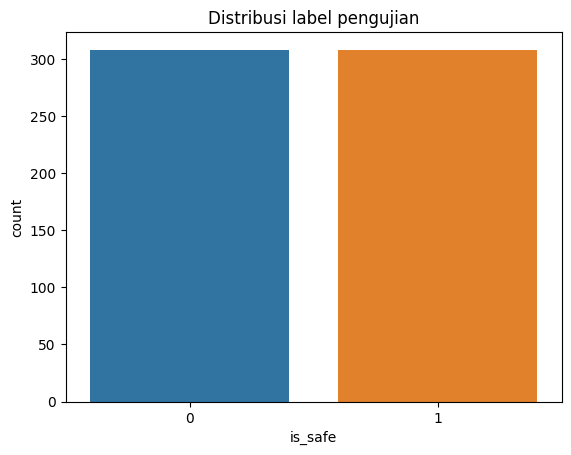

In [36]:
sns.countplot(x = y_test)
plt.title("Distribusi label pengujian")
plt.xlabel("is_safe")
plt.show()

### Melakukan standarisasi

Fitur latih dan fitur uji distandarisasikan dengan StandardScaler

In [37]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Data Modelling

### Fungsi One-hot encoding dan decoding

In [38]:
def onehot_enc(lbl, min_val=0):
  mi = min(lbl)
  enc = np.full((len(lbl), max(lbl) - mi + 1), min_val, np.int8)
  for i, x in enumerate(lbl):
    enc[i, x - mi] = 1
  return enc

def onehot_dec(enc, mi=0):
  return [np.argmax(e) + mi for e in enc]

### Fungsi aktivasi Sigmoid dan derivatifnya

In [39]:
def sig(X):
  return [1 / (1 + np.exp(-x)) for x in X]

def sigd(X):
  output = []
  for i, x in enumerate(X):
    s = sig([x])[0]
    output.append(s * (1 - s))
  return output

### Fungsi pelatihan Backpropagation

In [40]:
def bp_fit(X, target, layer_conf, max_epoch, max_error=.1, learn_rate=.1, print_per_epoch=100):
  np.random.seed(1)
  nin = [np.empty(i) for i in layer_conf]
  n = [np.empty(j + 1) if i < len(layer_conf) - 1 else np.empty(j) for i, j in enumerate(layer_conf)]
  w = np.array([np.random.rand(layer_conf[i] + 1, layer_conf[i + 1]) for i in range(len(layer_conf) - 1)])
  dw = [np.empty((layer_conf[i] + 1, layer_conf[i + 1])) for i in range(len(layer_conf) - 1)]
  d = [np.empty(s) for s in layer_conf[1:]]
  din = [np.empty(s) for s in layer_conf[1:-1]]
  epoch = 0
  mse = 1

  for i in range(0, len(n)-1):
    n[i][-1] = 1

  while (max_epoch == -1 or epoch < max_epoch) and mse > max_error:
    epoch += 1
    mse = 0
    for r in range(len(X)):
      n[0][:-1] = X[r]

      for L in range(1, len(layer_conf)):
        nin[L] = np.dot(n[L-1], w[L-1])
        n[L][:len(nin[L])] = sig(nin[L])

      e = target[r] - n[-1]
      mse += sum(e ** 2)
      d[-1] = e * sigd(nin[-1])
      dw[-1] = learn_rate * d[-1] * n[-2].reshape((-1, 1))

      for L in range(len(layer_conf) - 1, 1, -1):
        din[L-2] = np.dot(d[L-1], np.transpose(w[L-1][:-1]))
        d[L-2] = din[L-2] * np.array(sigd(nin[L-1]))
        dw[L-2] = (learn_rate * d[L-2]) * n[L-2].reshape((-1, 1))

      w += dw

    mse /= len(X)
    if print_per_epoch > -1 and epoch % print_per_epoch == 0:
      print(f'Epoch {epoch}, MSE: {mse}')
  return w, epoch, mse

### Fungsi pengujian Backpropagation

In [41]:
def bp_predict(X, w):
  n = [np.empty(len(i)) for i in w]
  nin = [np.empty(len(i[0])) for i in w]
  predict = []
  n.append(np.empty(len(w[-1][0])))
  for x in X:
    n[0][:-1] = x
    for L in range(0, len(w)):
      nin[L] = np.dot(n[L], w[L])
      n[L + 1][:len(nin[L])] = sig(nin[L])
    predict.append(n[-1].copy())
  return predict

### Proses pelatihan dan pengujian

In [42]:
y_train = onehot_enc(y_train)
y_test = onehot_enc(y_test)

In [35]:
w, ep, mse = bp_fit(X_train, y_train, layer_conf=(20, 10, 2), learn_rate=.2, max_epoch=500, max_error=.01, print_per_epoch=25)
print(f'Epochs: {ep}, MSE: {mse}')
predict = bp_predict(X_test, w)
predict = onehot_dec(predict)
y_test = onehot_dec(y_test)
accuracy = accuracy_score(predict, y_test)

print('Output:', predict)
print('True :', y_test)
print('Accuracy:', accuracy)

<ipython-input-32-71a28cde7060>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  w = np.array([np.random.rand(layer_conf[i] + 1, layer_conf[i + 1]) for i in range(len(layer_conf) - 1)])
<ipython-input-32-71a28cde7060>:35: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  w += dw


Epoch 25, MSE: 0.048279693620426896
Epoch 50, MSE: 0.04176573968001703
Epoch 75, MSE: 0.04195645929898683
Epoch 100, MSE: 0.04174908586360749
Epoch 125, MSE: 0.041190615733592166
Epoch 150, MSE: 0.04128323053182316
Epoch 175, MSE: 0.041702240378845165
Epoch 200, MSE: 0.040905470611184096
Epoch 225, MSE: 0.0414492316132472
Epoch 250, MSE: 0.042390514418052964
Epoch 275, MSE: 0.04253066466267281
Epoch 300, MSE: 0.04383051375990399
Epoch 325, MSE: 0.044350611533635106
Epoch 350, MSE: 0.04442391564383034
Epoch 375, MSE: 0.043975439033890694
Epoch 400, MSE: 0.04437208378103121
Epoch 425, MSE: 0.04411783209730008
Epoch 450, MSE: 0.04681475618635745
Epoch 475, MSE: 0.04550852828647585
Epoch 500, MSE: 0.04580655578316475
Epochs: 500, MSE: 0.04580655578316475
Output: [0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0,

In [36]:
report = classification_report(y_test, predict)
print(report)

              precision    recall  f1-score   support

           0       0.95      0.69      0.80       308
           1       0.76      0.96      0.85       308

    accuracy                           0.83       616
   macro avg       0.85      0.83      0.82       616
weighted avg       0.85      0.83      0.82       616



## Evaluation

### Classification report metode tuning terbaik

Melakukan evaluasi model dengan classification report

In [ ]:
report = classification_report(y_test, predict)
print(report)

              precision    recall  f1-score   support

           0       0.95      0.69      0.80       308
           1       0.76      0.96      0.85       308

    accuracy                           0.83       616
   macro avg       0.85      0.83      0.82       616
weighted avg       0.85      0.83      0.82       616



### Confusion matrix metode tuning terbaik

Melakukan evaluasi model dengan confusion matrix

Text(77.92222222222227, 0.5, 'Data Sebenarnya')

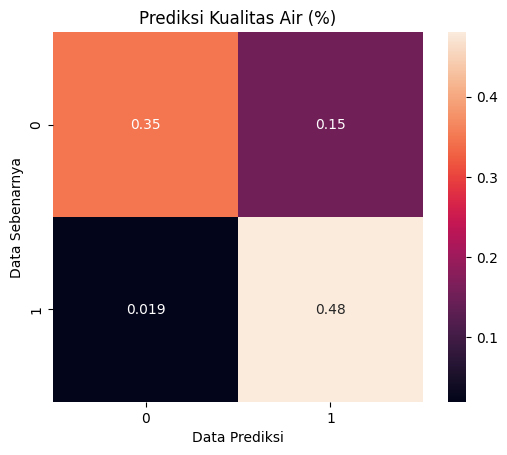

In [37]:
cm = confusion_matrix(y_test, predict)
sns.heatmap(cm/np.sum(cm), annot = True, square = True)
plt.title("Prediksi Kualitas Air (%)")
plt.xlabel('Data Prediksi')
plt.ylabel('Data Sebenarnya')